<a href="https://colab.research.google.com/github/blayk11/fcc-pandas-sales-trend/blob/main/notebooks/sales_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Vendas com Pandas
Objetivo: Analisar dados de vendas com Pandas, incluindo estatísticas de idade e quantidade de pedidos, com visualizações personalizadas.

## Dados & Fonte
Dataset: sales_data.csv (freeCodeCamp, curso Data Analysis with Python).
Colunas: Date, Customer_Age, Order_Quantity, Unit_Price, Country, Product, etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/blayk11/fcc-pandas-sales-trend/refs/heads/main/data/sales_data.csv'
df = pd.read_csv(url)
df.head()
df.info()
df.columns

In [ ]:
# Média de Customer_Age
print(df['Customer_Age'].mean())

# Histograma de Customer_Age
df['Customer_Age'].plot(kind='hist', title='Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.savefig('age_histogram.png', dpi=150, bbox_inches='tight')
plt.show()

# Boxplot de Customer_Age
df['Customer_Age'].plot(kind='box')
plt.title('Boxplot de Idade dos Clientes')
plt.savefig('age_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

# KDE de Customer_Age
df['Customer_Age'].plot(kind='kde', title='Densidade de Idade dos Clientes')
plt.xlabel('Idade')
plt.savefig('age_kde.png', dpi=150, bbox_inches='tight')
plt.show()

Correlação entre Customer_Age e Order_Quantity:
                Customer_Age  Order_Quantity
Customer_Age        1.000000        0.026887
Order_Quantity      0.026887        1.000000


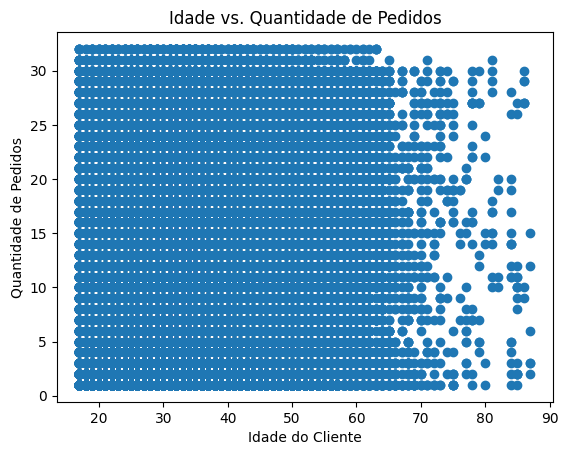

In [12]:
# Correlação entre Customer_Age e Order_Quantity
correlation = df[['Customer_Age', 'Order_Quantity']].corr()
print("Correlação entre Customer_Age e Order_Quantity:")
print(correlation)

# Gráfico de dispersão
plt.scatter(df['Customer_Age'], df['Order_Quantity'])
plt.xlabel('Idade do Cliente')
plt.ylabel('Quantidade de Pedidos')
plt.title('Idade vs. Quantidade de Pedidos')
plt.savefig('age_vs_quantity.png', dpi=150, bbox_inches='tight')
plt.show()

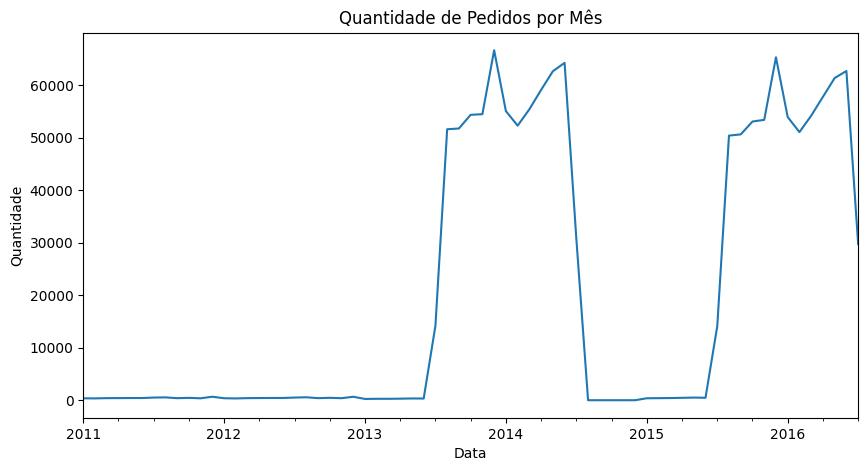

In [15]:
# Converter Date para datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Agrupar por mês (soma de Order_Quantity)
ts = df.set_index('Date').resample('ME')['Order_Quantity'].sum()

# Gráfico de tendência
ts.plot(figsize=(10, 5))
plt.title('Quantidade de Pedidos por Mês')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.savefig('quantity_trend.png', dpi=150, bbox_inches='tight')
plt.show()

## Insights
- Média de idade dos clientes: ~35 anos.
- Pico de pedidos em meados de 2014.
- Correlação baixa entre idade e quantidade de pedidos.